<a href="https://colab.research.google.com/github/juDEcorous/Potential-Datasets-for-Machine-Learning/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Heart Disease Prediction**

Context:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Data Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Target:

**The target for this data set to predict whether or not, patients would develope heart failure exacerbation using the risk factors of heart Disease.**

This will be a Classification Metrics.


## Data Dictionary

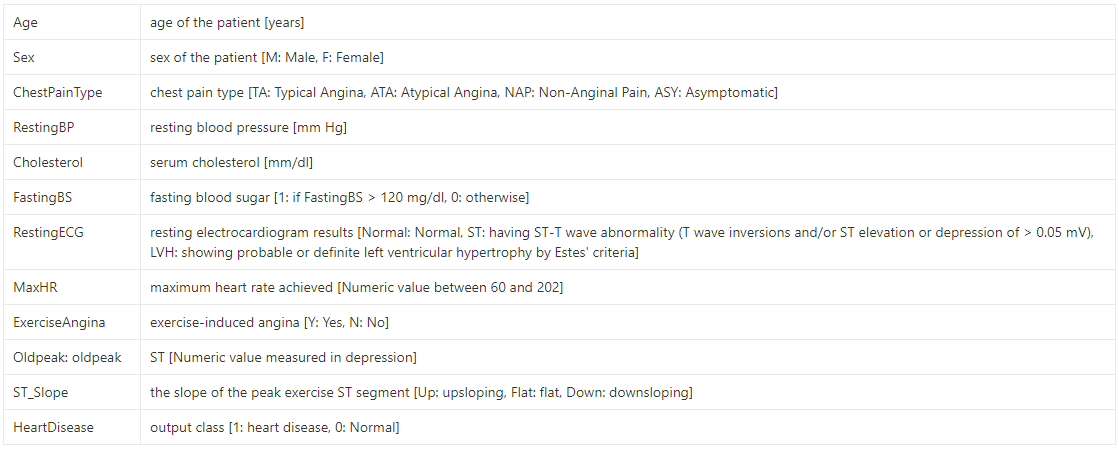




**The target for this data set to predict if patients would develope heart failure exacerbation using the risk factors of heart Disease.**

# Imports


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data Inspection

In [ ]:
path = '/content/drive/MyDrive/Datas/project/heart.csv'

In [ ]:
hf = pd.read_csv(path)
hf.info()
hf.sample(10)

In [ ]:
#Check and address duplicates
hf.duplicated().sum()

In [ ]:
#Check and address missing values
hf.isna().sum()

In [ ]:
hf.HeartDisease.value_counts(normalize = True)*100

We have an imbalance target in favour of Heart Disease, which means that our metrics can be misleading. The prediction will be more bias towards predicting Heart Disease.

## Numerical Columns

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
data_types = hf.dtypes
int_data = data_types[(data_types == 'int')]

for column in int_data.index:
  print(column)
  print(f'Unique Values: {hf[column].unique()}\n')
  
float_data = data_types[(data_types == 'float')]

for column in float_data.index:
  print(column)
  print(f'Unique Values: {hf[column].unique()}\n')

In [ ]:
hf.describe()

In [ ]:
hf.loc[hf.RestingBP == 0]

In [ ]:
hf.loc[hf.Cholesterol == 0].sample(5)

- **Age Column** are within normal range.
- **RestingBP** have 200 value on it which TOO high but is not impossible as high BP (180/100 mmHG) are actually associated with heart attack, stroke or other life-threathening health problems. A resting BP of 0 is suspicious so we need to drop that sample, if this means that the patient is gone, I believe it is better if sample will not be included in our data set.
- Under the **Cholesterol** column, our 75th percentile value 267 and the max value is 603 which is about twice as many. Also, our minimum shows 0 which is suspicious and there are 172 samples with this value. ***For this 0 values I will be converting them as a missing value.*** While doing research, I noticed that the system of unit used was **mm/dL** and most of my sources used **mg/dL**. I am not sure if converting the units from mm/dL to mg/dL would be of any use. For this column we need to ask more details to the Medical Professionals or the one who gathers the data for more informations and  confirmation. But as for now, I will treat the value of meassurement as a typo.</br> 
sources: 
  * https://www.medicalnewstoday.com/articles/cholesterol-over-500#:~:text=Triglyceride%20levels%20over%20500%20mg,for%20heart%20disease%20and%20stroke
  * https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=lipid_panel_nonhdl#:~:text=Less%20than%2070%20milligrams%20per,159%20mg%2FdL%20%E2%80%93%20borderline%20high
- **FastingBS** column looks suspicious but it is under ordinal, in this case 1 are those patients who has has >120 mg/dL result on Fasting Blood Sugar, and 0 are those who have < 120 mg/dL  
- **MaxHR** column looks normal
- As for our **Oldpeak** column. 6.2 seems to be an impossible together with 5 and 5.6. However, this is possible - this ST depression happen when the coronoary artery blockage is extensive.
- **HeartDisease** column shows us weather a patient have heart disease or not

For now we are going to remove the impossible values (0) in RestingBP column.


In [ ]:
hf.drop(449, inplace = True)

In [ ]:
#checking if the row has been dropped
hf.loc[hf.RestingBP == 0]

I will make another set where I am going to treat my Zero values on Cholesterol column as missing value. I will train both of these data set and see which data set makes the best prediction.

In [ ]:
hf2 = hf.copy()
hf2.describe()

In [ ]:
hf2['Cholesterol'] = hf2['Cholesterol'].replace(0, np.nan)
hf2.describe()

In [ ]:
hf2.isna().sum()

Now I have a new dataset **(hf2)** with a missing values on the Cholesterol Column.
## Categorical Column

In [ ]:
obj_data = data_types[(data_types == 'object')]

for column in obj_data.index:
  print(column)
  print(f'Unique Values: {hf[column].unique()}\n')

- We have no inconsistencies in our Categorical Column

## Exploratory Data Analysis

In [ ]:
numerical_columns = list(hf.select_dtypes(include='number'))
categorical_columns = list(hf.select_dtypes(include='object'))

### Numerical EDA

In [ ]:
for column in numerical_columns:

  column_name = column
  
  plot = sns.histplot(data = hf2, x = column, bins = 15, 
                      color='darkseagreen')
  plot.set_title('EDA for column ' + column_name)
  
  plt.show()

### Categorical EDA

In [ ]:
for column in categorical_columns:

  column_name = column
  
  plot = sns.countplot(data = hf2, y = column, palette='GnBu')
  plot.set_title('EDA for column ' + column_name)
  
  plt.show()

  print('\n\n')

### Correlation Heatmap

In [ ]:
corr = hf2.corr()
sns.heatmap(corr, annot = True, cmap = 'GnBu')

Generally speaking seems like our dataset doesn't have a good correlation with each other. 

Our target doesn't have any strong or moderate correlation with our Numerical Columns. However, a low correlation is seen between our target and columns MaxHR and Oldpeak.


### Multivariate EDA
I will put 'hue' on my arguement and choose a graph to use for demontration.

In [ ]:
# Multivariate graph with Heart DSE and other categorical column
for column in categorical_columns:

  column_name = column
  
  plot = sns.countplot(data = hf2, x = column, hue = 'HeartDisease', 
                       palette = 'winter')
  plot.set_title('Distribution of Heart Disease in column ' + column_name)
  
  plt.show()

  print('\n\n')

## Explanatory Visual Analysis

In [ ]:
fig1 = px.pie(hf2, values = 'HeartDisease', names = 'Sex',
              title = 'Number of Patients with Heart Disease',
              color_discrete_sequence = px.colors.sequential.Darkmint)
fig1.show()

This Pie Chart shows the gender distribution of patients with Heart Disease. As we can see, in this data set 90.1% of our patients who have Heart Disease are Male and 9.86% are the female patients with heart Disease.

In [ ]:
fig2 = px.bar(hf2, x = 'Age', y = 'HeartDisease',
             title = 'Ages of Patients with Heart Disease',
              color_discrete_sequence = ['seagreen'])
fig2.show()

This graph shows the age distribution of patients with Heart Disease. Most of our patients are 46 years old and the number decline after 58 years old.

In [ ]:
fig3 = px.bar(hf2, x = 'HeartDisease', y = 'ChestPainType',
             labels = {'HeartDisease': 'Number of Patients with Heart Disease',
                       'ChestPainType': 'Chest Pain Type',
                       'Sex': 'Gender'
             },
             title = 'Chest Pain Types of Patients with Heart Disease',
               color_discrete_sequence = ['seagreen'])
fig3.show()

This Bar graph shows the types of chest pain the patients with Heart Disease have. Surprisingly, most of our patients with the disease shows to have an Asymptomatic(ASY) Chest Pain. Non-Anginal Pain(NAP) comes second. Typical Angina(TA) and Atypical Angina(ATA) have almost the same ratio and there is about 25 patients with this Chest Pain. It seems like most of our patients with Heart Disease doesn't show much Angina than what I expected them to. 

In [ ]:
fig4 = px.bar(hf2, x = 'ST_Slope', y = 'HeartDisease',
              title = 'ST segment slope during Peak Exercise',
              labels = {'ST_Slope' : 'Slope of ST segment',
                        'HeartDisease' : 'Number of patients with Heart Disease'
              }, color_discrete_sequence = ['seagreen'])
fig4.show()

I believe that Exercise tolerance testing was done to get the ST segment slope during Peak Exercise. An article indicates that, "The normal ST segment during exercise slopes sharply upwards." Also the same article suggest that, "The standard criterion for an abnormal ST segment response is horizontal (planar) or downsloping depression of >1 mm."

**Article:** https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/#:~:text=Normal%20trace%20during%20exercise&text=The%20normal%20ST%20segment%20during,ms%20after%20the%20J%20point.

In this graph, we see the have about 75 patients who have Heart Disease have normal ST slopes during the Peak Exercise and about 50 patients have an abnormal ST response. We have about 375 patients who have Flat ST slope during the exercise.

# Machine Learning
# 1st Data Set

In [ ]:
hf.info()
hf.head()

#2nd Data Set

In [ ]:
hf2.info()
hf2.head()